## NOTES
This is simply a notebook with some example data that has been rescaled. It is not designed to reproduce the expected results from the paper.
The model itself is 150mb large and the dataset 140gb. So if you would like access please contact david.harvey@epfl.ch

In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import sys
import glob
import darkCNN
import numpy as np
from matplotlib import pyplot as plt
import numpy as np

/Users/davidharvey/Work/darkCNN/lib/python3.10/site-packages/darkCNN-0.0.1-py3.10.egg/darkCNN/getSIDMdata.py:210: SyntaxWarning: assertion is always true, perhaps remove parentheses?
/Users/davidharvey/Work/darkCNN/lib/python3.10/site-packages/darkCNN-0.0.1-py3.10.egg/darkCNN/getSIDMdata.py:210: SyntaxWarning: assertion is always true, perhaps remove parentheses?


Get the training and test samples 

In [10]:
channels = ['total','xray','stellar']
simulationNames = ['CDM','SIDM0.1','SIDM1']
list_of_meta = ['bcg_e']

In [11]:
train, test, params = darkCNN.getData(augment_data=True, simulationNames=simulationNames, 
                                                      channels=channels, 
                                                      allDataFile='exampleCNN.pkl', 
                                                      random_state=0, return_test_params=True, 
                                                      meta_data=list_of_meta, add_noise=None)

Plot some examples of the dataset

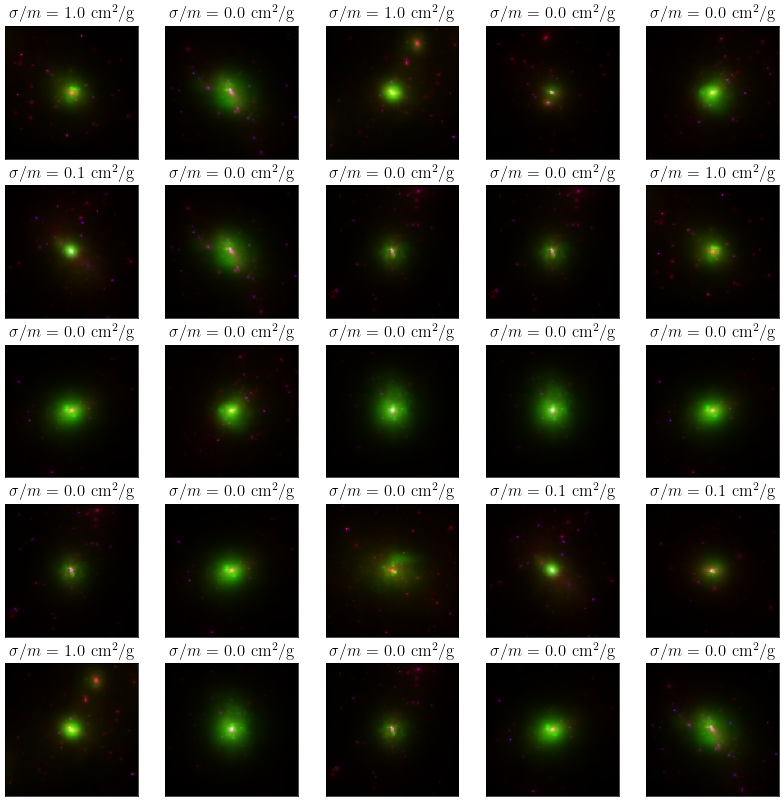

In [24]:
nClasses = len(np.unique(test[1]))
inputShape = test[0][0].shape[1:]
plt.figure(figsize=(10,10))
for j in range(25):
    i = np.random.randint(0, test[0][0].shape[0])
    plt.subplot(5,5,j+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test[0][0][i], cmap=plt.cm.binary)
        # The CIFAR labels happen to be arrays, 
        # which is why you need the extra index
    plt.title(r"$\sigma/m$ = %s cm$^2$/g" % params['label'][i])
plt.show()

Plot the predictions

The loss and accuracy for the training and test samples

In [13]:
model = darkCNN.tf.keras.models.load_model("../models/simple")

In [16]:
model = darkCNN.get_best_model( train, test, base_cnn_input_shape=test[0][0][0].shape, 
                               model_name='Inception', 
                                checkpoint_filepath="pickles/merten_arch", meta=['bcg_e'], epochs=50)

Epoch 1/50
2/2 [==============================] - ETA: 0s - loss: 1.0513 - accuracy: 0.5532

INFO:tensorflow:Assets written to: pickles/merten_arch/assets


INFO:tensorflow:Assets written to: pickles/merten_arch/assets


2/2 [==============================] - 16s 13s/step - loss: 1.0513 - accuracy: 0.5532 - val_loss: 1.2249 - val_accuracy: 0.1667
Epoch 2/50
2/2 [==============================] - ETA: 0s - loss: 0.9428 - accuracy: 0.7234

INFO:tensorflow:Assets written to: pickles/merten_arch/assets


INFO:tensorflow:Assets written to: pickles/merten_arch/assets


2/2 [==============================] - 12s 12s/step - loss: 0.9428 - accuracy: 0.7234 - val_loss: 1.1180 - val_accuracy: 0.3333
Epoch 3/50
2/2 [==============================] - ETA: 0s - loss: 0.8969 - accuracy: 0.7660

INFO:tensorflow:Assets written to: pickles/merten_arch/assets


INFO:tensorflow:Assets written to: pickles/merten_arch/assets


2/2 [==============================] - 13s 12s/step - loss: 0.8969 - accuracy: 0.7660 - val_loss: 0.9880 - val_accuracy: 0.5833
Epoch 4/50
2/2 [==============================] - 1s 213ms/step - loss: 0.8946 - accuracy: 0.7660 - val_loss: 1.1115 - val_accuracy: 0.3333
Epoch 5/50
2/2 [==============================] - 1s 206ms/step - loss: 0.8737 - accuracy: 0.7447 - val_loss: 0.9261 - val_accuracy: 0.5833
Epoch 6/50
2/2 [==============================] - 1s 207ms/step - loss: 0.8490 - accuracy: 0.7447 - val_loss: 0.9497 - val_accuracy: 0.5833
Epoch 7/50
2/2 [==============================] - 1s 344ms/step - loss: 0.8415 - accuracy: 0.7447 - val_loss: 0.9614 - val_accuracy: 0.5833
Epoch 8/50
2/2 [==============================] - 1s 350ms/step - loss: 0.8157 - accuracy: 0.7447 - val_loss: 0.9651 - val_accuracy: 0.5833
Epoch 9/50
2/2 [==============================] - 1s 214ms/step - loss: 0.8409 - accuracy: 0.6809 - val_loss: 0.9909 - val_accuracy: 0.5000
Epoch 10/50
2/2 [===============

INFO:tensorflow:Assets written to: pickles/merten_arch/assets


INFO:tensorflow:Assets written to: pickles/merten_arch/assets


2/2 [==============================] - 13s 12s/step - loss: 0.6986 - accuracy: 0.7447 - val_loss: 0.8507 - val_accuracy: 0.6667
Epoch 29/50
2/2 [==============================] - 1s 211ms/step - loss: 0.6451 - accuracy: 0.7660 - val_loss: 0.9637 - val_accuracy: 0.5833
Epoch 30/50
2/2 [==============================] - 1s 464ms/step - loss: 0.6396 - accuracy: 0.7660 - val_loss: 1.0301 - val_accuracy: 0.5833
Epoch 31/50
2/2 [==============================] - 1s 361ms/step - loss: 0.6290 - accuracy: 0.7660 - val_loss: 1.0359 - val_accuracy: 0.5833
Epoch 32/50
2/2 [==============================] - 1s 227ms/step - loss: 0.6507 - accuracy: 0.7660 - val_loss: 1.0408 - val_accuracy: 0.5833
Epoch 33/50
2/2 [==============================] - 1s 351ms/step - loss: 0.6270 - accuracy: 0.7660 - val_loss: 1.0453 - val_accuracy: 0.5833
Epoch 34/50
2/2 [==============================] - 1s 216ms/step - loss: 0.6365 - accuracy: 0.7660 - val_loss: 1.0528 - val_accuracy: 0.5833
Epoch 35/50
2/2 [=========

Add some noise and then evalulate

In [27]:
these_noise  = { 'total':{'ngal_per_sq_arcmin':100},
                 'xray' :{'exposure_time':10_000}}
train, test, params = darkCNN.getData(augment_data=True, simulationNames=simulationNames, 
                                                      channels=channels, 
                                                      allDataFile='exampleCNN.pkl', 
                                                      random_state=0, return_test_params=True, 
                                                      meta_data=list_of_meta, add_noise=these_noise)

Adding noise to : ['total', 'xray']
{'zl': 0.3, 'zs': 2.0, 'ngal_per_sq_arcmin': 100, 'kpc_per_pixel': 20.0, 'ell_disp': 0.3, 'e1_bias': [0.0, 0.0], 'e2_bias': [0.0, 0.0], 'interpolate': False}
{'exposure_time': 10000, 'kpc_per_pixel': 20, 'zl': 0.3}


Now plot the noisey images

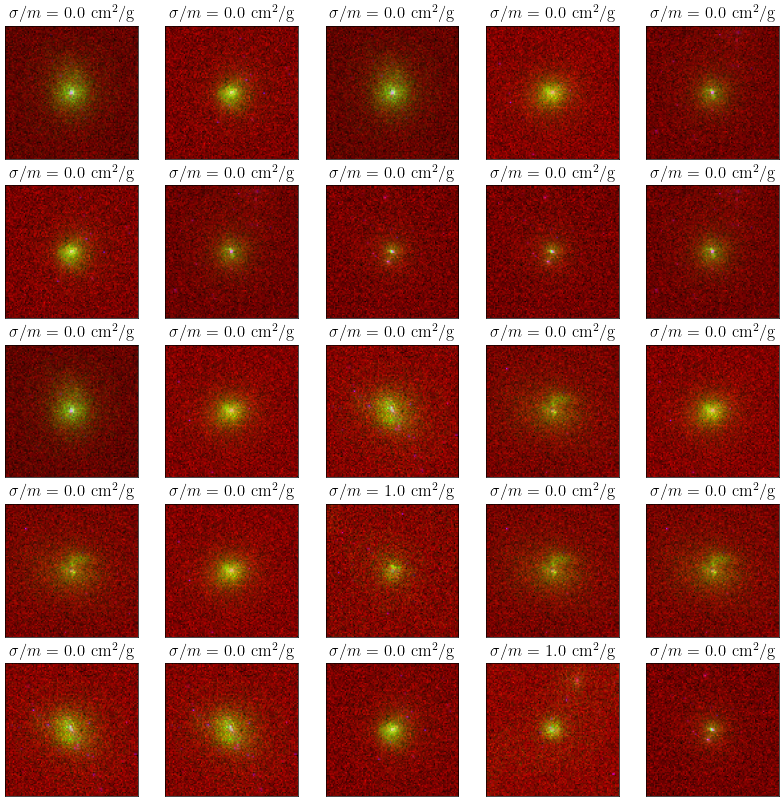

In [29]:
nClasses = len(np.unique(test[1]))
inputShape = test[0][0].shape[1:]
plt.figure(figsize=(10,10))
for j in range(25):
    i = np.random.randint(0, test[0][0].shape[0])
    plt.subplot(5,5,j+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test[0][0][i], cmap=plt.cm.binary)
        # The CIFAR labels happen to be arrays, 
        # which is why you need the extra index
    plt.title(r"$\sigma/m$ = %s cm$^2$/g" % params['label'][i])
plt.show()

And evaluate

In [30]:
model.evaluate(test[0],test[1])

1/1 [==============================] - 0s 52ms/step - loss: 1.8366 - accuracy: 0.1667


[1.836644172668457, 0.1666666716337204]